In [1]:
%matplotlib notebook
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Orion
x = [-0.41, 0.57, 0.07, 0.00, -0.29, -0.32,-0.50,-0.23, -0.23]
y = [4.12, 7.71, 2.36, 9.10, 13.35, 8.13, 7.19, 13.25,13.43]
z = [2.06, 0.84, 1.56, 2.07, 2.36, 1.72, 0.66, 1.25,1.38]

<IPython.core.display.Javascript object>


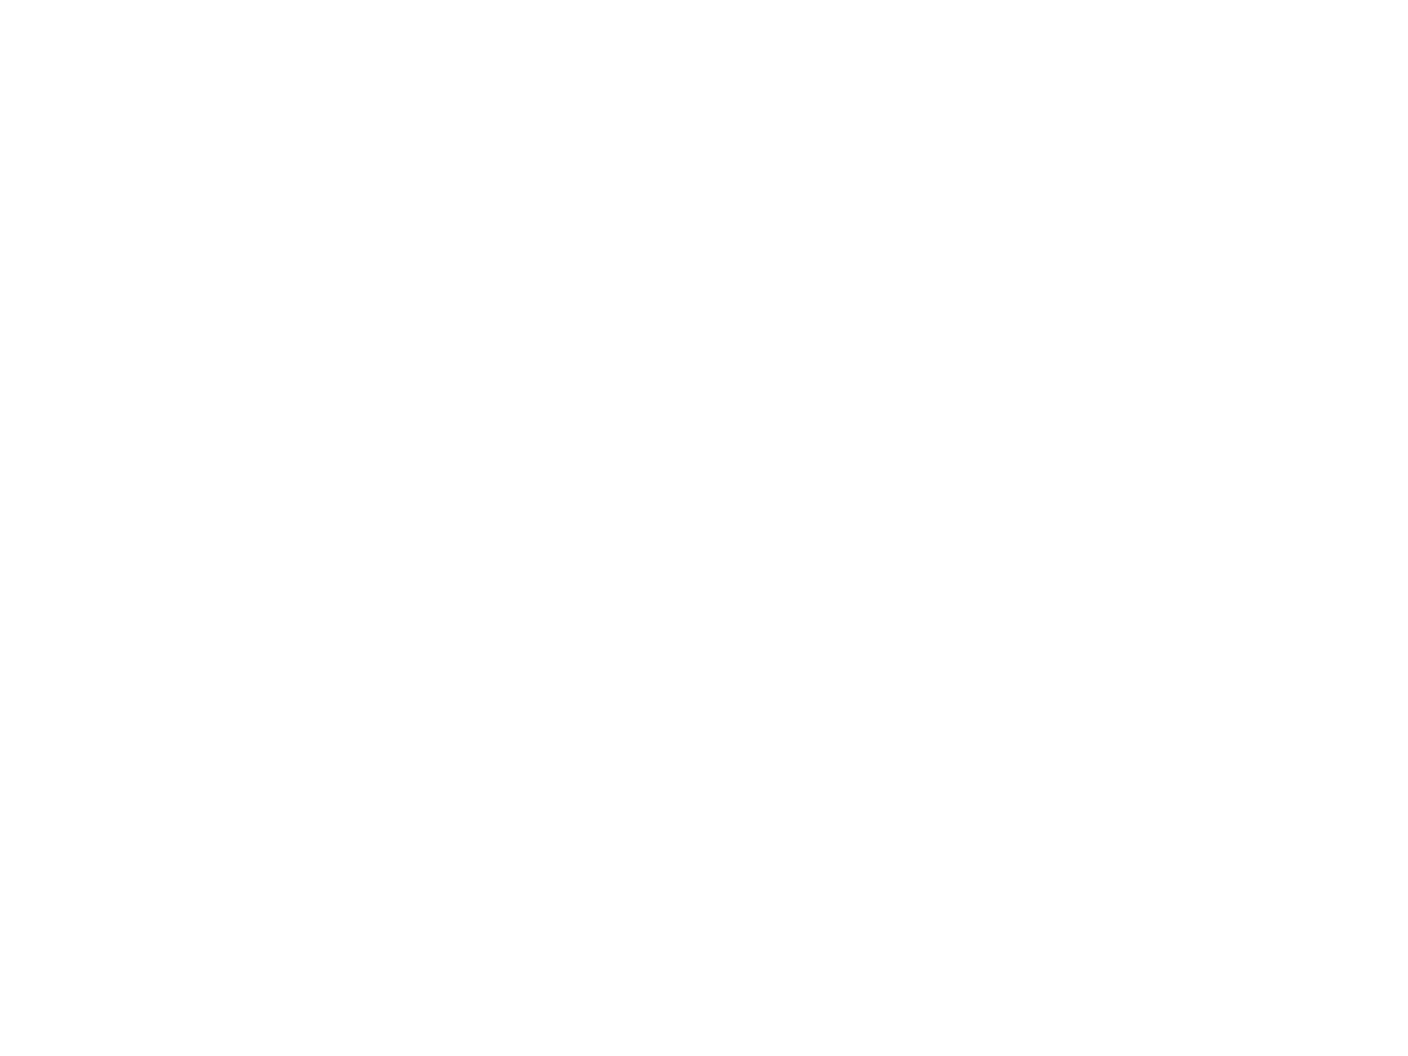

In [3]:
fig_2d = plt.figure()
ax = fig_2d.add_subplot(1,1,1)
plt.scatter(x,y, color = 'yellow', marker = '*')
plt.title('2D Visualization of the Orion Constellation')
plt.xlabel('Orion x Coordinates')
plt.ylabel('Orion y Coordinates')
ax.set_facecolor('xkcd:black')
plt.show()


<IPython.core.display.Javascript object>


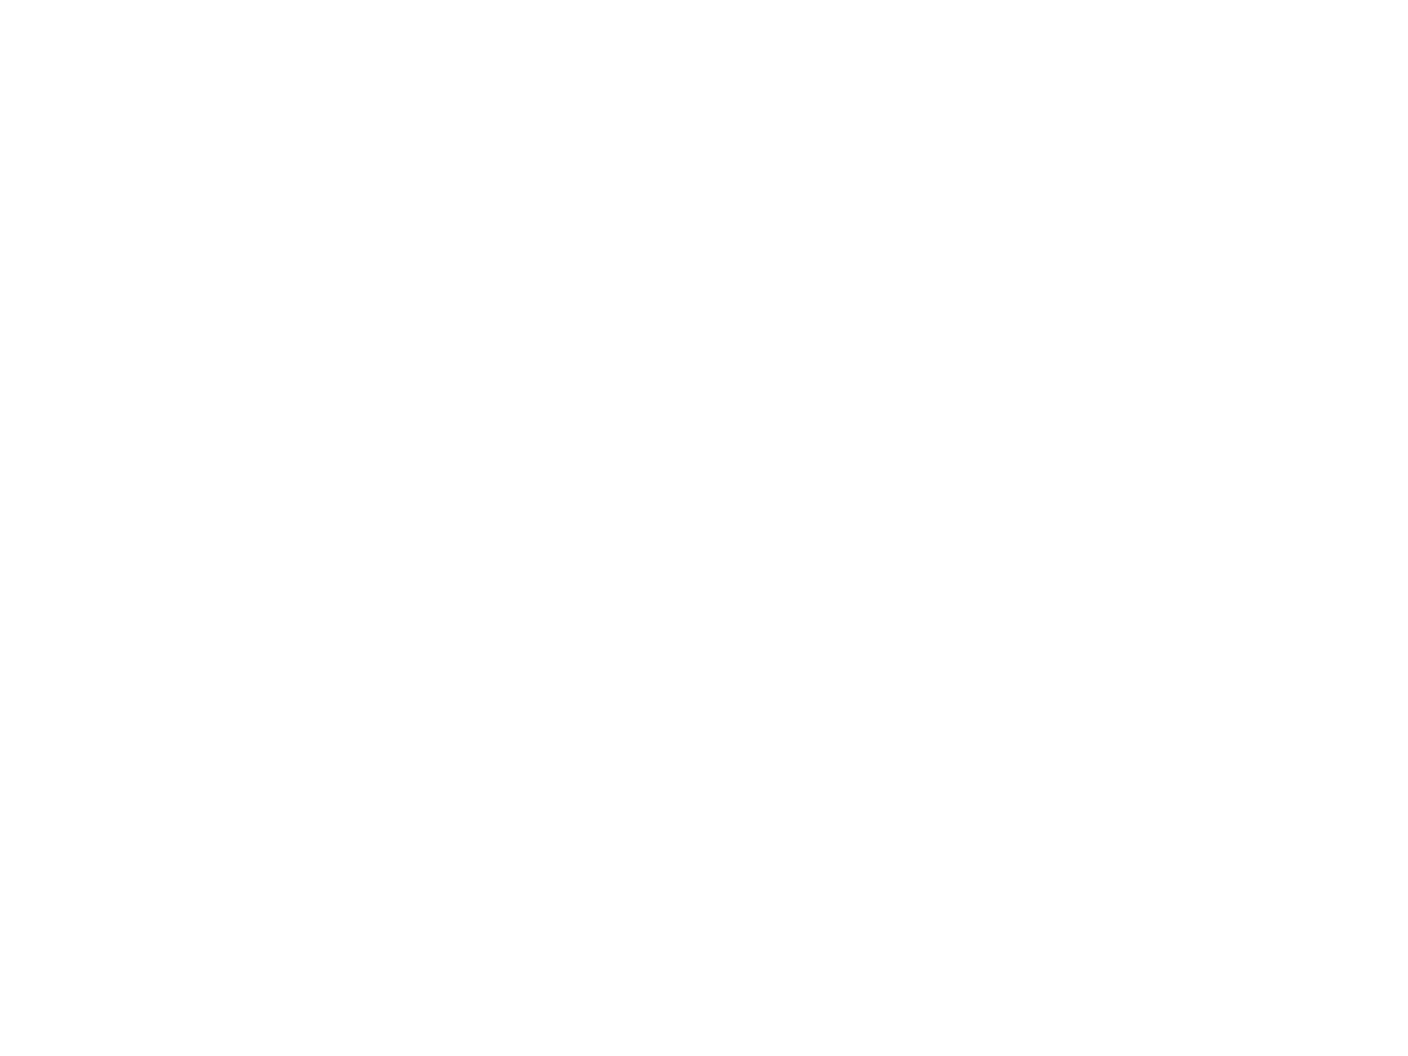

In [4]:
projection="3d"
fig_3d = plt.figure()
constellation3d = fig_3d.add_subplot(1,1,1,projection="3d")
constellation3d.scatter(x,y,z, color = 'yellow', marker = '*', s=50)
plt.title('3D Visualization of the Orion Constellation')
constellation3d.set_xlabel('Orion x Coordinates')
constellation3d.set_ylabel('Orion y Coordinates')
constellation3d.set_zlabel('Orion z Coordinates')
plt.gca().patch.set_facecolor('white')
constellation3d.w_xaxis.set_pane_color((0, 0, 0, 1.0))
constellation3d.w_yaxis.set_pane_color((0, 0, 0, 1.0))
constellation3d.w_zaxis.set_pane_color((0, 0, 0, 1.0))
plt.show()

In [5]:
%matplotlib inline
import numpy as np
from matplotlib.projections import get_projection_names
from astropy.coordinates import ICRS

In [6]:
from desiutil.plots import prepare_data, init_sky, plot_grid_map, plot_healpix_map, plot_sky_circles, plot_sky_binned

In [8]:
stars = ICRS(['05h14m32.27s', '05h55m10.29s', '05h25m07.87s', '05h36m12.81s', '05h40m45.52s', '05h47m45.39s', '05h32m00.40s',
              '06h45m09.25s', '06h58m37.55s', '07h08m23.49s', '06h22m41.99s', '07h24m05.71s',
              '02h31m47.08s', '14h50m42.40s', '15h20m43.75s', '16h45m58.16s', '15h44m03.46s', '17h32m12.90s', '16h17m30.50s',
              '12h54m01.63s', '11h03m43.84s', '13h47m32.55s', '13h23m55.54s', '11h01m50.39s', '11h53m49.74s', '12h15m25.45s',],
             ['−08d12m05.9s', '+07d24m25.3s', '+06d20m59.0s', '−01d12m06.9s', '−01d56m33.3s', '−09d40m10.6s', '−00d17m56.7s',
              '-16d42m47.3s', '-28d58m19.5s', '−26d23m35.5s', '−17d57m21.3s', '−29d18m11.2s',
              '+89d15m50.9s', '+74d09m19.7s', '+71d50m02.3s', '+82d02m14.1s', '+77d47m40.2s', '+86d35m10.8s', '+75d45m16.9s',
              '+55d57m35.4s', '+61d45m04.0s', '+49d18m47.9s', '+54d55m31.3s', '+56d22m56.4s', '+53d41m41.0s', '+57d01m57.4s'])

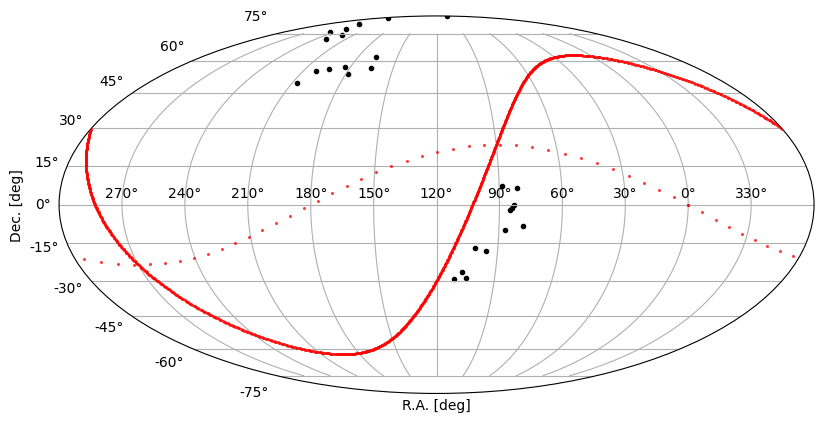

In [9]:
ax = init_sky()
p = ax.scatter(ax.projection_ra(stars.ra.degree), ax.projection_dec(stars.dec.degree), marker='.', color='black')

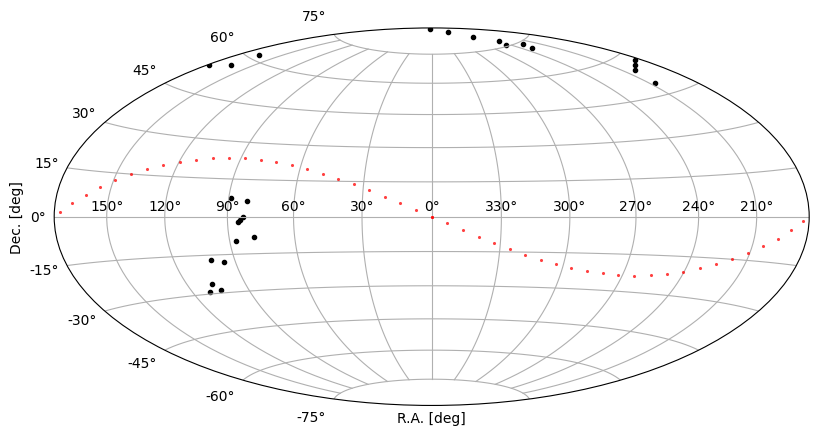

In [10]:
ax = init_sky(projection='hammer', ra_center=0, galactic_plane_color=None)
p = ax.scatter(ax.projection_ra(stars.ra.degree), ax.projection_dec(stars.dec.degree), marker='.', color='black')

In [11]:
get_projection_names()

['3d', 'aitoff', 'hammer', 'lambert', 'mollweide', 'polar', 'rectilinear']

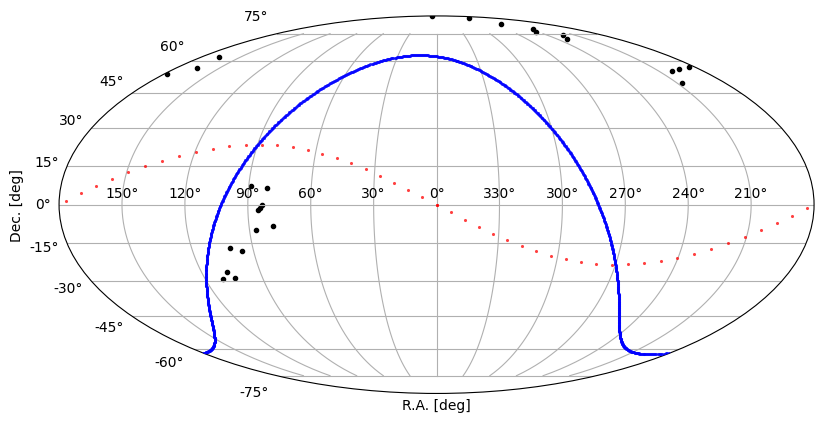

In [13]:
ax = init_sky(projection='mollweide', ra_center=0, galactic_plane_color="blue")
p = ax.scatter(ax.projection_ra(stars.ra.degree), ax.projection_dec(stars.dec.degree), marker='.', color='black')

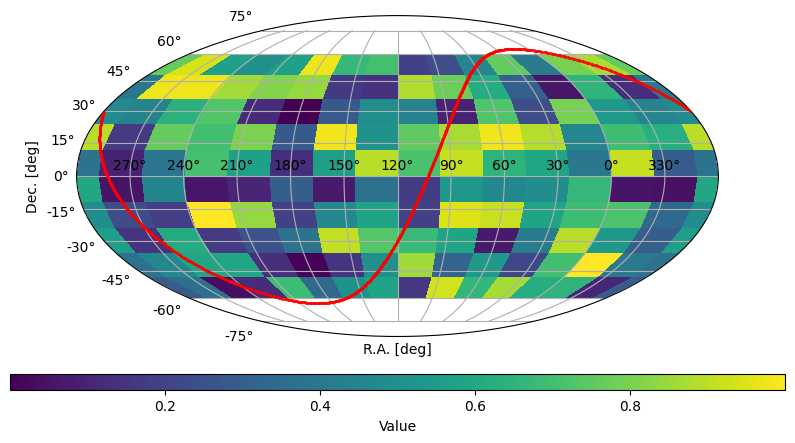

In [14]:
np.random.seed(20200415)  # For reproducible maps.
n_ra, n_dec = 15, 10
ra_edges = np.linspace(0., 360., n_ra + 1)
dec_edges = np.linspace(-60., 60., n_dec + 1)
data = np.random.uniform(size=(n_dec, n_ra))
ax = plot_grid_map(data, ra_edges, dec_edges, label='Value',
                   galactic_plane_color="red", ecliptic_plane_color=None)


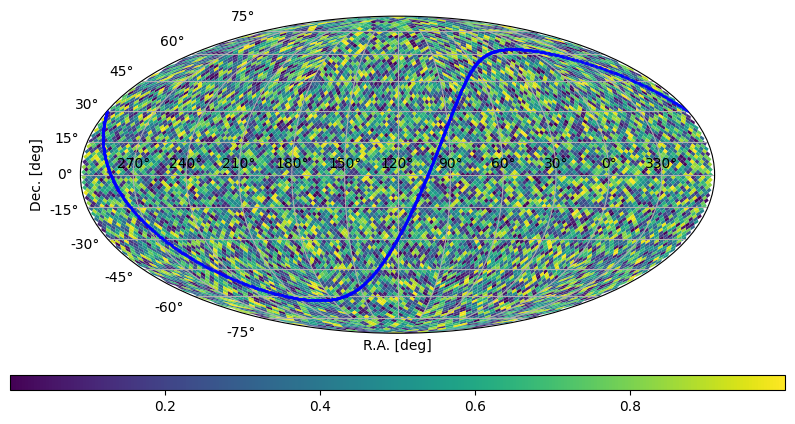

In [24]:
import healpy as hp
nside, nest = 32, False
data = np.random.uniform(size=hp.nside2npix(nside))
ax = plot_healpix_map(data, nest, galactic_plane_color="blue", ecliptic_plane_color=None)

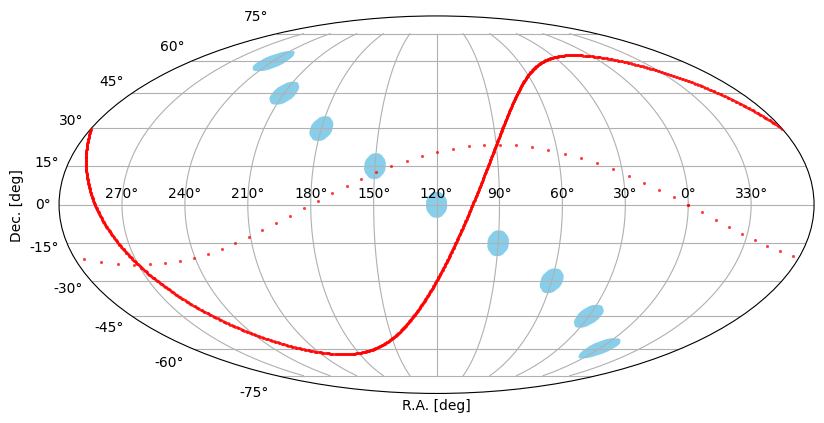

In [22]:
ax = plot_sky_circles(ra_center=[0, 30, 60, 90, 120, 150, 180, 210, 240],
                      dec_center=[-60, -45, -30, -15, 0, 15, 30, 45, 60],
                      field_of_view=10)

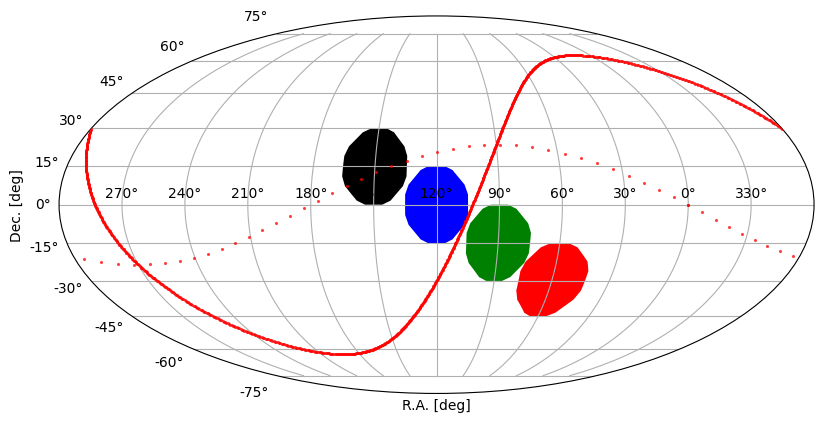

In [25]:
ax = plot_sky_circles(ra_center=[60, 90, 120, 150],
                      dec_center=[-30, -15, 0, 15],
                      field_of_view=30,
                      facecolors=['r', 'g', 'b', 'k'])

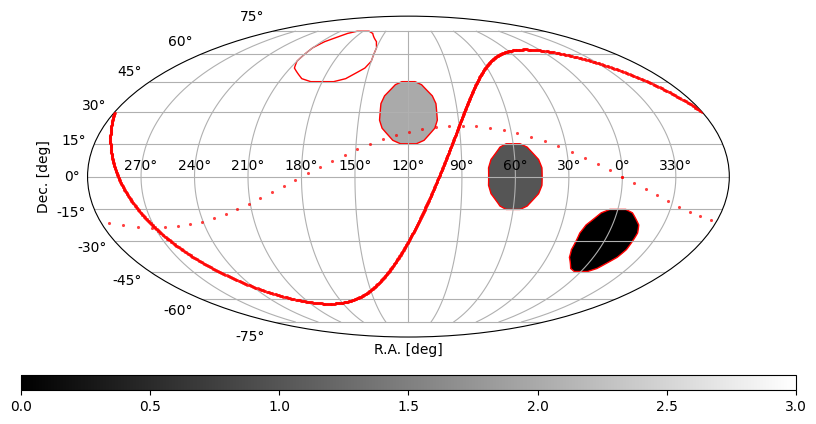

In [26]:
ax = plot_sky_circles(ra_center=[0, 60, 120, 180],
                      dec_center=[-30, 0, 30, 60],
                      field_of_view=30,
                      data=[0, 1, 2, 3], cmap='gray', edgecolor='r');

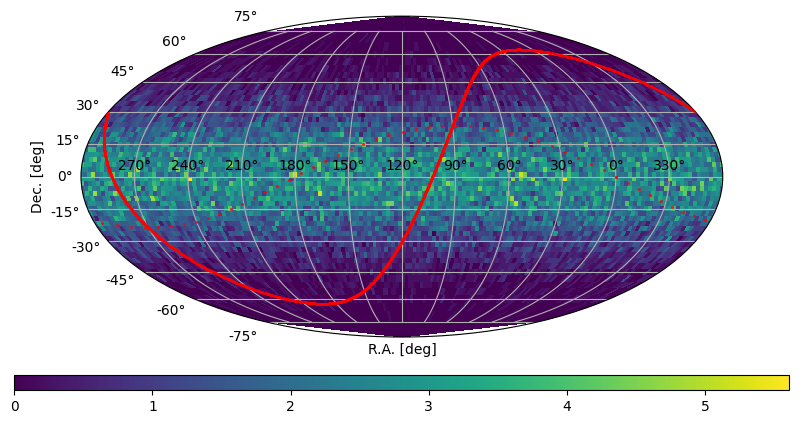

In [27]:
n = 50000
ra = 360 * np.random.uniform(size=n)
dec = np.clip(20 * np.random.normal(size=n), -90, +90)
ax = plot_sky_binned(ra, dec)

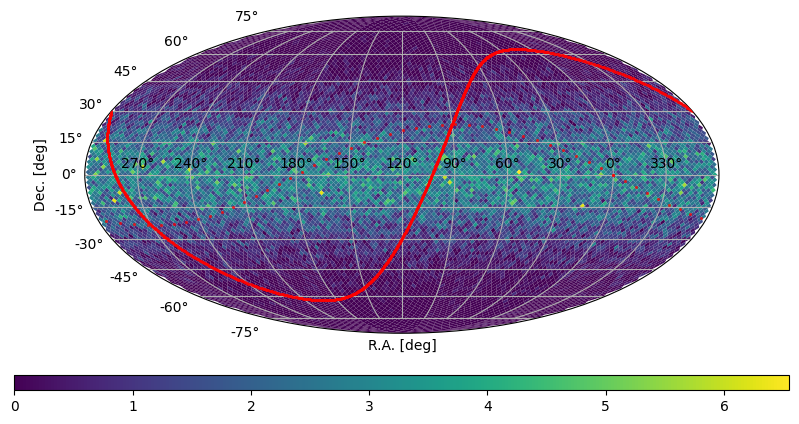

In [28]:
ax = plot_sky_binned(ra, dec, plot_type='healpix')

Using 17 x 49 grid in cos(DEC) x RA with pixel area 49.523 sq.deg.


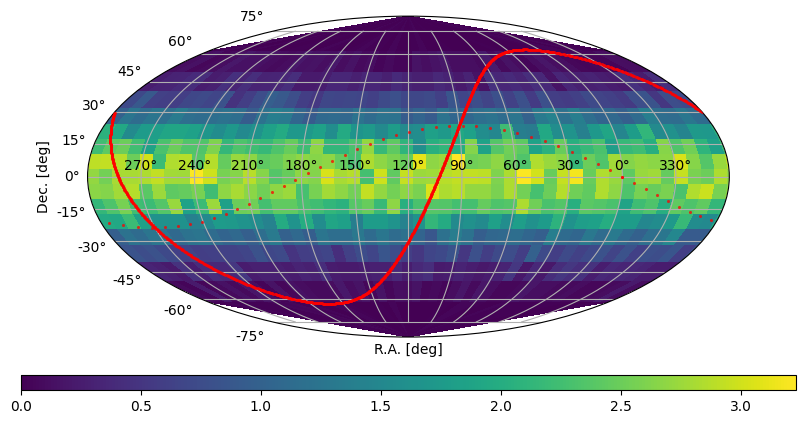

In [29]:
ax = plot_sky_binned(ra, dec, max_bin_area=50, verbose=True)

Using healpix map with NSIDE=16 and pixel area 13.429 sq.deg.


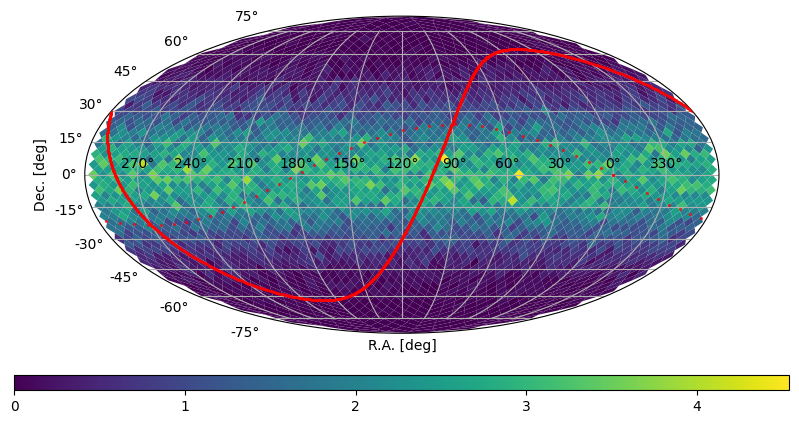

In [30]:
ax = plot_sky_binned(ra, dec, plot_type='healpix', max_bin_area=50, verbose=True)

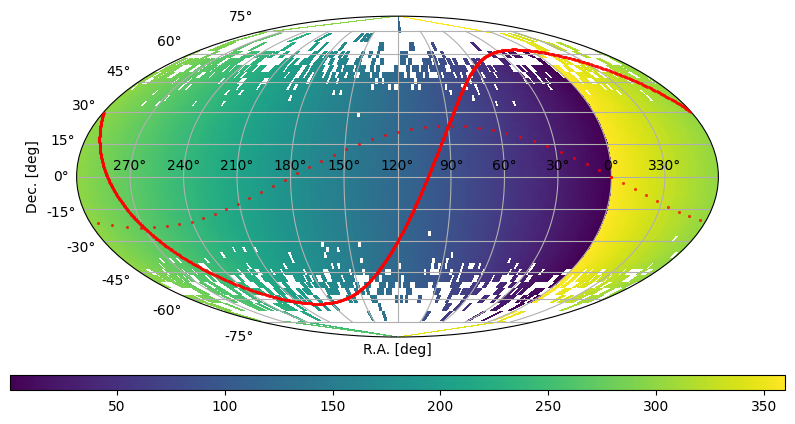

In [31]:
ax = plot_sky_binned(ra, dec, data=ra)

Using 82 x 252 grid in cos(DEC) x RA with pixel area 1.996 sq.deg.


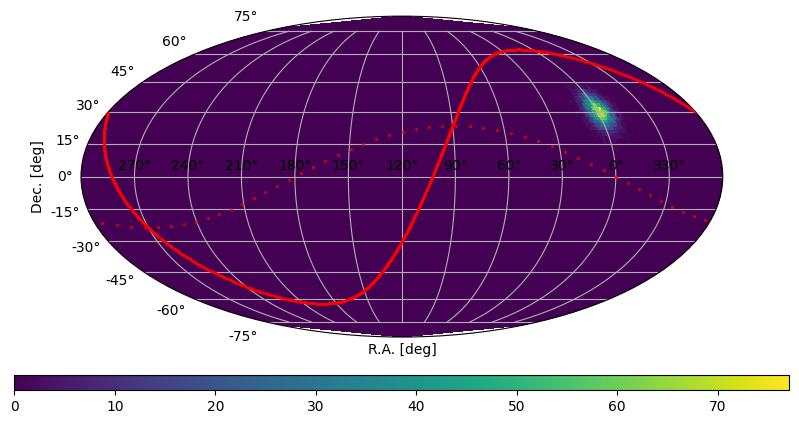

In [32]:
ra_source = np.random.normal(loc=0.0, scale=5.0, size=(10000,))
dec_source = np.random.normal(loc=30.0, scale=5.0, size=(10000,))
ra_source[ra_source < 0] += 360.0
ax = plot_sky_binned(ra_source, dec_source, max_bin_area=2.0, verbose=True)

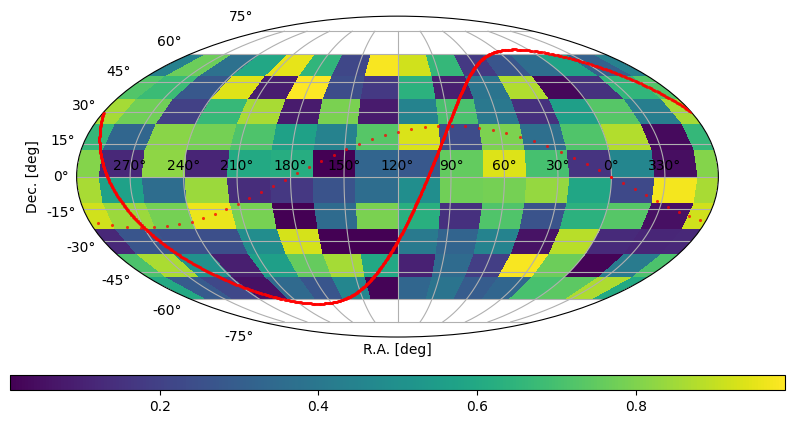

In [33]:
n_ra, n_dec = 15, 10
ra_edges = np.linspace(0., 360., n_ra + 1)
dec_edges = np.linspace(-60., 60., n_dec + 1)
data = np.random.uniform(size=(n_dec, n_ra))
ax = plot_grid_map(data, ra_edges, dec_edges)

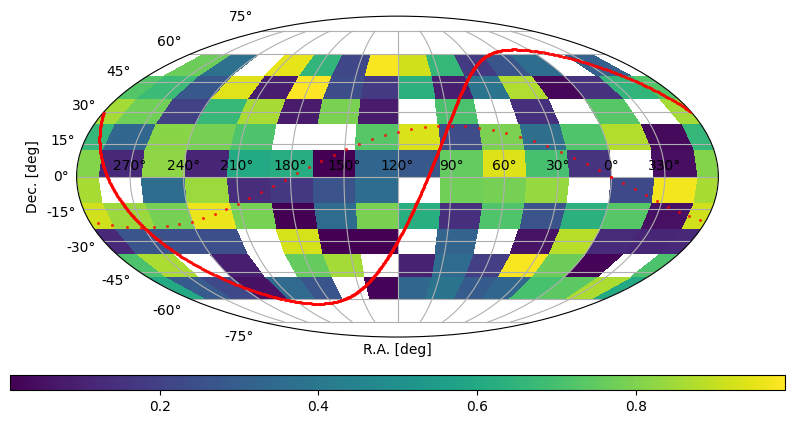

In [34]:
data2 = prepare_data(data, mask=(0.4 < data) & (data < 0.6))
ax = plot_grid_map(data2, ra_edges, dec_edges)

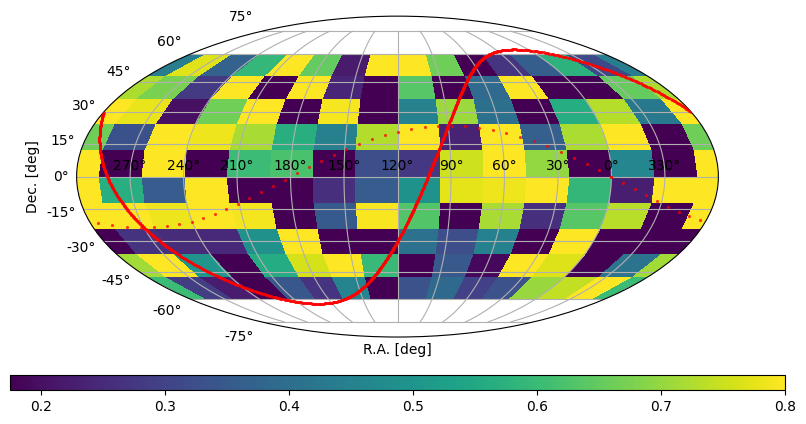

In [35]:
data2 = prepare_data(data, clip_lo='20%', clip_hi=0.8)
ax = plot_grid_map(data2, ra_edges, dec_edges)

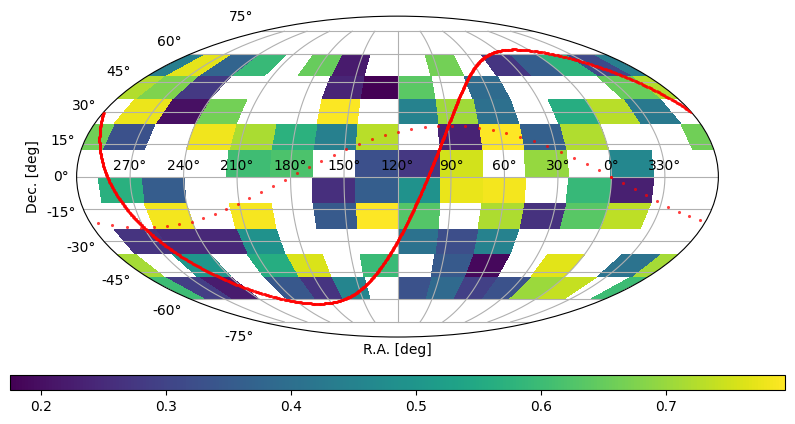

In [36]:
data2 = prepare_data(data, clip_lo='!20%', clip_hi='!0.8')
ax = plot_grid_map(data2, ra_edges, dec_edges)

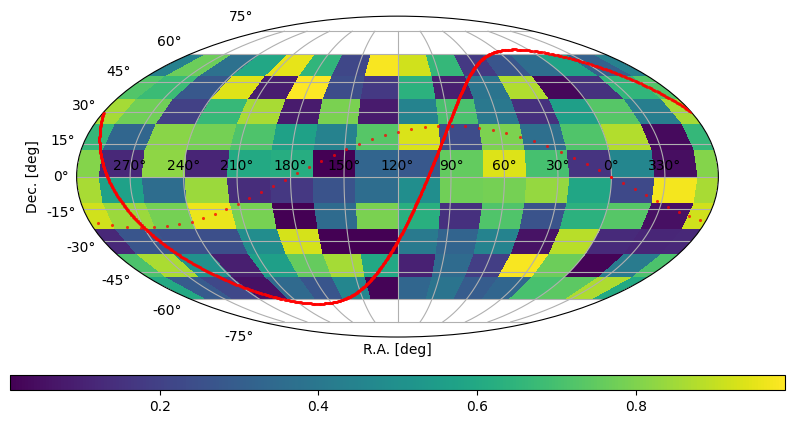

In [37]:
data2 = prepare_data(data, clip_lo=-0.5, clip_hi=1.5)
ax = plot_grid_map(data2, ra_edges, dec_edges)